# Enunciado

In [1]:
#instalar pycountry
#!pip install pycountry_convert


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
import pycountry_convert as pc
import matplotlib.patches as mpatches
import pycountry

In [3]:
def color(continente):
    if continente=="Europe":
        return 'blue'
    if continente=="Oceania":
        return 'yellow'

    if continente=='North America':
        return 'red'

    if continente=='South America':
        return 'green'

    if continente=='Australia':
        return 'orange'

    if continente=='Africa':
        return 'brown'

    if continente=='Asia':
        return 'grey'


In [4]:
def country_to_continent(country_name):
    if country_name=='Timor-Leste' or country_name=='State of Palestine' or country_name=='Sao Tome & Principe' or country_name=='DR Congo':
        return 'Asia'
    if country_name=='St. Vincent & Grenadines' or country_name=='Saint Kitts & Nevis':
        return 'North America'
    if country_name=='Holy See' or country_name=='Czech Republic (Czechia)':
        return 'Europe'
    else:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)   
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
        return country_continent_name

In [5]:
def maxValue(columna):
    return columna.idxmax(),columna.max()

In [6]:
def minValue(columna):
    return columna.idxmin(),columna.min()

In [7]:
def buscarChile(columna):
    #Funcion que obtiene el ranking de Chile
    cont = 0
    for i in columna.index:
        cont +=1
        if i == "Chile":
            return cont

In [8]:
def series(fecha):
    #incidencia
    for i in conf_pob.index:
        incidencia = conf_pob[pd.to_datetime(fecha)]*100000/conf_pob['Population (2020)']
    #muerte
    for i in muerte_pob.index:
        muerte = muerte_pob[pd.to_datetime(fecha)]*100000/muerte_pob['Population (2020)']
    #recuperacion
    for i in rec_pob.index:
        recuperacion = rec_pob[pd.to_datetime(fecha)]*100000/rec_pob['Population (2020)']
    return incidencia,muerte,recuperacion

    

In [9]:
def compara(x,y):
    Lista1=[]
    for i in x.index:
        Lista1.append(i)

    Lista2=[]
    for i in y.index:
        Lista2.append(i)

    Iguales=[]
    Diferentes=[]
    for i in Lista1:
        if i in Lista2:
            Iguales.append(i)
            Lista2.remove(i)
        else:
            Diferentes.append(i)
    return Iguales , Diferentes, Lista2


## Preparación de datos (1.0pt)

Explore el archivo `covid19_confirmados.csv` y configure la función `pd.read_csv` para importarlo como un `DataFrame`

1. Utilice el nombre de país como índice
1. Elimine las columnas `Lat` y `Long`
1. Use TimeStamps para las columnas asociadas a fechas
1. Reduzca la columna `Province/State`. El DataFrame resultante debe tener los totales a nivel país

## Casos confirmados

In [10]:
Casos_Conf = pd.read_csv('./data/covid19_confirmados.csv', index_col = 'Country/Region',parse_dates=True, infer_datetime_format=True)
Casos_Conf.drop(['Lat','Long'],axis='columns', inplace=True)
colname=['Province/State']
for x in Casos_Conf:
    if x!='Province/State':
        x=pd.to_datetime(x)
        colname.append(x)
Casos_Conf.columns=colname
Casos_Conf['Province/State'] = Casos_Conf[pd.to_datetime('2022-04-10')]
Casos_Conf.rename(columns={'Province/State':'Casos totales'}, inplace=True)
Casos_Conf.index.duplicated().sum()
Casos_Conf = Casos_Conf.groupby(Casos_Conf.index).sum()
Casos_Conf

,Casos totales,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,...,2022-04-01 00:00:00,2022-04-02 00:00:00,2022-04-03 00:00:00,2022-04-04 00:00:00,2022-04-05 00:00:00,2022-04-06 00:00:00,2022-04-07 00:00:00,2022-04-08 00:00:00,2022-04-09 00:00:00,2022-04-10 00:00:00
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,177974,0,0,0,0,0,0,0,0,0,...,177782,177803,177827,177897,177932,177974,177974,177974,177974,177974
Albania,274219,0,0,0,0,0,0,0,0,0,...,273759,273823,273870,273913,274000,274055,274108,274136,274191,274219
Algeria,265724,0,0,0,0,0,0,0,0,0,...,265679,265684,265691,265694,265699,265705,265707,265714,265720,265724
Andorra,40328,0,0,0,0,0,0,0,0,0,...,40024,40024,40024,40024,40024,40024,40328,40328,40328,40328
Angola,99194,0,0,0,0,0,0,0,0,0,...,99194,99194,99194,99194,99194,99194,99194,99194,99194,99194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,656287,0,0,0,0,0,0,0,0,0,...,655750,655750,655750,656287,656287,656287,656287,656287,656287,656287
Winter Olympics 2022,535,0,0,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
Yemen,11813,0,0,0,0,0,0,0,0,0,...,11806,11806,11806,11808,11812,11812,11812,11812,11813,11813


Explore el archivo `population_by_country_2020.csv` y configure la función `read_csv` de pandas para importarlo como un `DataFrame`. Utilice el nombre de país como índice principal. 

Nota: Algunos siglas o nombres podrían no calzar con el `DataFrame` anterior, explore y corrija programaticamente dichos errores

## Poblacion por pais

In [11]:
poblacion = pd.read_csv('./data/poblacion_mundial2020.csv', index_col = 'Country (or dependency)',parse_dates=True, infer_datetime_format=True)
poblacion.drop(['Net Change','Density (P/Km²)','Land Area (Km²)','Migrants (net)'],axis='columns', inplace=True)
colname2=['Country (or dependency)']
# for x in poblacion:
#     if x!='Country (or dependency)':
#         x=pd.to_datetime(x)
#         colname2.append(x)
# poblacion.columns=colname2
poblacion.index.duplicated().sum()
poblacion = poblacion.groupby(poblacion.index).sum()
poblacion

,Population (2020)
Country (or dependency),
Afghanistan,39074280
Albania,2877239
Algeria,43984569
American Samoa,55169
Andorra,77287
...,...
Wallis & Futuna,11203
Western Sahara,599769
Yemen,29935468


## Muerte por pais

In [12]:
Muertes = pd.read_csv('./data/covid19_muertes.csv', index_col = 'Country/Region',parse_dates=True, infer_datetime_format=True)
Muertes.drop(['Lat','Long'],axis='columns', inplace=True)
colname=['Province/State']
for x in Muertes:
    if x!='Province/State':
        x=pd.to_datetime(x)
        colname.append(x)
Muertes.columns=colname
Muertes['Province/State'] = Muertes[pd.to_datetime('2022-04-10')]
Muertes.rename(columns={'Province/State':'Muertes totales'}, inplace=True)
Muertes.index.duplicated().sum()
Muertes = Muertes.groupby(Muertes.index).sum()
Muertes

,Muertes totales,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,...,2022-04-01 00:00:00,2022-04-02 00:00:00,2022-04-03 00:00:00,2022-04-04 00:00:00,2022-04-05 00:00:00,2022-04-06 00:00:00,2022-04-07 00:00:00,2022-04-08 00:00:00,2022-04-09 00:00:00,2022-04-10 00:00:00
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,7671,0,0,0,0,0,0,0,0,0,...,7670,7671,7671,7671,7671,7671,7671,7671,7671,7671
Albania,3493,0,0,0,0,0,0,0,0,0,...,3492,3492,3492,3492,3492,3492,3492,3492,3492,3493
Algeria,6874,0,0,0,0,0,0,0,0,0,...,6874,6874,6874,6874,6874,6874,6874,6874,6874,6874
Andorra,153,0,0,0,0,0,0,0,0,0,...,153,153,153,153,153,153,153,153,153,153
Angola,1900,0,0,0,0,0,0,0,0,0,...,1900,1900,1900,1900,1900,1900,1900,1900,1900,1900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,5655,0,0,0,0,0,0,0,0,0,...,5655,5655,5655,5655,5655,5655,5655,5655,5655,5655
Winter Olympics 2022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yemen,2147,0,0,0,0,0,0,0,0,0,...,2143,2143,2143,2144,2144,2144,2145,2146,2147,2147


## Recuperados por pais

In [13]:
Casos_recuperados = pd.read_csv('./data/covid19_recuperados.csv', index_col = 'Country/Region',parse_dates=True, infer_datetime_format=True)
Casos_recuperados.drop(['Lat','Long'],axis='columns', inplace=True)
colname=['Province/State']
for x in Casos_recuperados:
    if x!='Province/State':
        x=pd.to_datetime(x)
        colname.append(x)
Casos_recuperados.columns=colname
Casos_recuperados['Province/State'] = Casos_recuperados[pd.to_datetime('2022-04-10')]
Casos_recuperados.rename(columns={'Province/State':'Casos totales'}, inplace=True)
Casos_recuperados.index.duplicated().sum()
Casos_recuperados = Casos_recuperados.groupby(Casos_recuperados.index).sum()
Casos_recuperados

,Casos totales,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,...,2022-04-01 00:00:00,2022-04-02 00:00:00,2022-04-03 00:00:00,2022-04-04 00:00:00,2022-04-05 00:00:00,2022-04-06 00:00:00,2022-04-07 00:00:00,2022-04-08 00:00:00,2022-04-09 00:00:00,2022-04-10 00:00:00
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Albania,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Algeria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Andorra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Angola,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Winter Olympics 2022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yemen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Funcion para luego cambiar los indices

In [14]:
a,b,c=compara(Casos_Conf,poblacion)

In [15]:
Casos_Conf = Casos_Conf.rename(index={'Congo (Brazzaville)':'DR Congo', 
                        'Congo (Kinshasa)':'DR Congo',
                        'Burma':'Myanmar',
                        "Cote d'Ivoire":"Côte d'Ivoire",
                        'Korea, South':'South Korea',
                        'Czechia':'Czech Republic (Czechia)',
                        'Saint Kitts and Nevis':'Saint Kitts & Nevis',
                        'Saint Vincent and the Grenadines':'St. Vincent & Grenadines',
                        'Sao Tome and Principe':'Sao Tome & Principe',
                        'Taiwan*':'Taiwan', 
                        'US':'United States', 
                        'West Bank and Gaza':'State of Palestine'}) 
Casos_Conf

,Casos totales,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,...,2022-04-01 00:00:00,2022-04-02 00:00:00,2022-04-03 00:00:00,2022-04-04 00:00:00,2022-04-05 00:00:00,2022-04-06 00:00:00,2022-04-07 00:00:00,2022-04-08 00:00:00,2022-04-09 00:00:00,2022-04-10 00:00:00
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,177974,0,0,0,0,0,0,0,0,0,...,177782,177803,177827,177897,177932,177974,177974,177974,177974,177974
Albania,274219,0,0,0,0,0,0,0,0,0,...,273759,273823,273870,273913,274000,274055,274108,274136,274191,274219
Algeria,265724,0,0,0,0,0,0,0,0,0,...,265679,265684,265691,265694,265699,265705,265707,265714,265720,265724
Andorra,40328,0,0,0,0,0,0,0,0,0,...,40024,40024,40024,40024,40024,40024,40328,40328,40328,40328
Angola,99194,0,0,0,0,0,0,0,0,0,...,99194,99194,99194,99194,99194,99194,99194,99194,99194,99194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
State of Palestine,656287,0,0,0,0,0,0,0,0,0,...,655750,655750,655750,656287,656287,656287,656287,656287,656287,656287
Winter Olympics 2022,535,0,0,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
Yemen,11813,0,0,0,0,0,0,0,0,0,...,11806,11806,11806,11808,11812,11812,11812,11812,11813,11813


In [16]:
Muertes = Muertes.rename(index={'Congo (Brazzaville)':'DR Congo', 
                        'Congo (Kinshasa)':'DR Congo',
                        'Burma':'Myanmar',
                        "Cote d'Ivoire":"Côte d'Ivoire",
                        'Korea, South':'South Korea',
                        'Czechia':'Czech Republic (Czechia)',
                        'Saint Kitts and Nevis':'Saint Kitts & Nevis',
                        'Saint Vincent and the Grenadines':'St. Vincent & Grenadines',
                        'Sao Tome and Principe':'Sao Tome & Principe',
                        'Taiwan*':'Taiwan', 
                        'US':'United States', 
                        'West Bank and Gaza':'State of Palestine'}) 
Muertes

,Muertes totales,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,...,2022-04-01 00:00:00,2022-04-02 00:00:00,2022-04-03 00:00:00,2022-04-04 00:00:00,2022-04-05 00:00:00,2022-04-06 00:00:00,2022-04-07 00:00:00,2022-04-08 00:00:00,2022-04-09 00:00:00,2022-04-10 00:00:00
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,7671,0,0,0,0,0,0,0,0,0,...,7670,7671,7671,7671,7671,7671,7671,7671,7671,7671
Albania,3493,0,0,0,0,0,0,0,0,0,...,3492,3492,3492,3492,3492,3492,3492,3492,3492,3493
Algeria,6874,0,0,0,0,0,0,0,0,0,...,6874,6874,6874,6874,6874,6874,6874,6874,6874,6874
Andorra,153,0,0,0,0,0,0,0,0,0,...,153,153,153,153,153,153,153,153,153,153
Angola,1900,0,0,0,0,0,0,0,0,0,...,1900,1900,1900,1900,1900,1900,1900,1900,1900,1900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
State of Palestine,5655,0,0,0,0,0,0,0,0,0,...,5655,5655,5655,5655,5655,5655,5655,5655,5655,5655
Winter Olympics 2022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yemen,2147,0,0,0,0,0,0,0,0,0,...,2143,2143,2143,2144,2144,2144,2145,2146,2147,2147


In [17]:

conf_pob = Casos_Conf.join(poblacion)
muerte_pob = Muertes.join(poblacion)
rec_pob = Casos_recuperados.join(poblacion)



In [18]:
print("Las columnas con nan en Population son:")
nans = pd.isnull(conf_pob["Population (2020)"])
conf_pob[nans]

# nans2 = pd.isnull(conf_pob["Casos totales"])
# conf_pob[nans2]

Las columnas con nan en Population son:


,Casos totales,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,...,2022-04-02 00:00:00,2022-04-03 00:00:00,2022-04-04 00:00:00,2022-04-05 00:00:00,2022-04-06 00:00:00,2022-04-07 00:00:00,2022-04-08 00:00:00,2022-04-09 00:00:00,2022-04-10 00:00:00,Population (2020)
Antarctica,11,0,0,0,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,NaN
Diamond Princess,712,0,0,0,0,0,0,0,0,0,...,712,712,712,712,712,712,712,712,712,NaN
Kosovo,227743,0,0,0,0,0,0,0,0,0,...,227533,227533,227579,227599,227628,227655,227681,227709,227743,NaN
MS Zaandam,9,0,0,0,0,0,0,0,0,0,...,9,9,9,9,9,9,9,9,9,NaN
Summer Olympics 2020,865,0,0,0,0,0,0,0,0,0,...,865,865,865,865,865,865,865,865,865,NaN
Winter Olympics 2022,535,0,0,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,NaN


In [19]:
Casos_recuperados = Casos_recuperados.rename(index={'Congo (Brazzaville)':'DR Congo', 
                        'Congo (Kinshasa)':'DR Congo',
                        'Burma':'Myanmar',
                        "Cote d'Ivoire":"Côte d'Ivoire",
                        'Korea, South':'South Korea',
                        'Czechia':'Czech Republic (Czechia)',
                        'Saint Kitts and Nevis':'Saint Kitts & Nevis',
                        'Saint Vincent and the Grenadines':'St. Vincent & Grenadines',
                        'Sao Tome and Principe':'Sao Tome & Principe',
                        'Taiwan*':'Taiwan', 
                        'US':'United States', 
                        'West Bank and Gaza':'State of Palestine'}) 
Casos_recuperados

,Casos totales,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,...,2022-04-01 00:00:00,2022-04-02 00:00:00,2022-04-03 00:00:00,2022-04-04 00:00:00,2022-04-05 00:00:00,2022-04-06 00:00:00,2022-04-07 00:00:00,2022-04-08 00:00:00,2022-04-09 00:00:00,2022-04-10 00:00:00
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Albania,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Algeria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Andorra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Angola,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
State of Palestine,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Winter Olympics 2022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yemen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Realice un `merge` de los `DataFrame` anteriores. El objetivo es asignar un valor de `Population` a cada elemento del primer `DataFrame`. Indique las filas donde no se puede realizar el `merge` y luego descártelas de su `DataFrame` final

Escriba funciones para el procedimiento anterior y aplíquelas en los archivos `covid19_recuperados.csv` y `covid19_muertes.csv` 

In [20]:

print("Antes del drop")
pob=[]
for i in conf_pob.index:
    pob.append(i)
print(len(pob))

conf_pob.dropna(subset = ["Population (2020)"], inplace=True)
muerte_pob.dropna(subset = ["Population (2020)"], inplace=True)
rec_pob.dropna(subset = ["Population (2020)"], inplace=True)
conf_pob

print("Despues del drop")
pob=[]
for i in conf_pob.index:
    pob.append(i)
print(len(pob))


Antes del drop
198
Despues del drop
192


In [21]:
conf_pob

,Casos totales,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,...,2022-04-02 00:00:00,2022-04-03 00:00:00,2022-04-04 00:00:00,2022-04-05 00:00:00,2022-04-06 00:00:00,2022-04-07 00:00:00,2022-04-08 00:00:00,2022-04-09 00:00:00,2022-04-10 00:00:00,Population (2020)
Afghanistan,177974,0,0,0,0,0,0,0,0,0,...,177803,177827,177897,177932,177974,177974,177974,177974,177974,39074280.0
Albania,274219,0,0,0,0,0,0,0,0,0,...,273823,273870,273913,274000,274055,274108,274136,274191,274219,2877239.0
Algeria,265724,0,0,0,0,0,0,0,0,0,...,265684,265691,265694,265699,265705,265707,265714,265720,265724,43984569.0
Andorra,40328,0,0,0,0,0,0,0,0,0,...,40024,40024,40024,40024,40024,40328,40328,40328,40328,77287.0
Angola,99194,0,0,0,0,0,0,0,0,0,...,99194,99194,99194,99194,99194,99194,99194,99194,99194,33032075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,521471,0,0,0,0,0,0,0,0,0,...,520708,520843,520905,521030,521105,521186,521325,521373,521471,28421581.0
Vietnam,10198236,0,2,2,2,2,2,2,2,2,...,9716282,9818328,9867045,9922040,9980464,10070692,10135789,10169929,10198236,97490013.0
Yemen,11813,0,0,0,0,0,0,0,0,0,...,11806,11806,11808,11812,11812,11812,11812,11813,11813,29935468.0
Zambia,317483,0,0,0,0,0,0,0,0,0,...,317031,317031,317110,317221,317358,317483,317483,317483,317483,18468257.0


## Análisis global (1.5pt)

Escriba una función que reciba una fecha y que retorne las siguientes series 

1. Tasa de incidencia: Casos confirmados por 100.000 dividido población total
1. Tasa de recuperación: Casos recuperados por 100.000 dividido población total
1. Tasa de mortalidad: Casos decesos por 100.000 dividido población total

Ahora, considerando los siguientes tres puntos temporales

- 22 de Enero de 2020
- 22 de Enero de 2021
- 22 de Enero de 2022

Muestre los nombres y los valores de los 3 países con

1. La mayor y menor tasa de incidencia, respectivamente
1. La mayor y menor tasa de recuperación, respectivamente
1. La mayor y menor tasa de mortalidad, respectivamente

Muestre también la posición de Chile en el ranking

In [22]:
incidencia1,muerte1,recuperacion1=series('2020-01-22')
incidencia2,muerte2,recuperacion2=series('2021-01-22')
incidencia3,muerte3,recuperacion3=series('2022-01-22')


In [23]:
print('Mayor tasa de incidencia 2020 '+str(maxValue(incidencia1)))
print('Mayor tasa de incidencia 2021 '+str(maxValue(incidencia2)))
print('Mayor tasa de incidencia 2022 '+str(maxValue(incidencia3)))
print('---------------------------------------------------------------')
print('Mayor tasa de muerte 2020 '+str(maxValue(muerte1)))
print('Mayor tasa de muerte 2021 '+str(maxValue(muerte2)))
print('Mayor tasa de muerte 2022 '+str(maxValue(muerte3)))
print('---------------------------------------------------------------')
print('Mayor tasa de recuperacion 2020 '+str(maxValue(recuperacion1)))
print('Mayor tasa de recuperacion 2021 '+str(maxValue(recuperacion2)))
print('Mayor tasa de recuperacion 2022 '+str(maxValue(recuperacion3)))

Mayor tasa de incidencia 2020 ('China', 0.03804768642207732)
Mayor tasa de incidencia 2021 ('Andorra', 12183.16146311799)
Mayor tasa de incidencia 2022 ('Andorra', 42730.34274845705)
---------------------------------------------------------------
Mayor tasa de muerte 2020 ('China', 0.0011803114401009388)
Mayor tasa de muerte 2021 ('Peru', 299.4413560627495)
Mayor tasa de muerte 2022 ('Peru', 617.6692790251777)
---------------------------------------------------------------
Mayor tasa de recuperacion 2020 ('Thailand', 0.0028640665744255837)
Mayor tasa de recuperacion 2021 ('Andorra', 11045.8421209259)
Mayor tasa de recuperacion 2022 ('Afghanistan', 0.0)


In [24]:
print("Menor tasa de incidencia 2020"+str(minValue(incidencia1)))
print("Menor tasa de incidencia 2021"+str(minValue(incidencia2)))
print("Menor tasa de incidencia 2022"+str(minValue(incidencia3)))
print('----------------------------------------------------------')
print("Menor tasa de muerte 2020"+str(minValue(muerte1)))
print("Menor tasa de muerte 2021"+str(minValue(muerte2)))
print("Menor tasa de muerte 2022"+str(minValue(muerte3)))
print('----------------------------------------------------------')
print("Menor tasa de recuperacion 2020"+str(minValue(recuperacion1)))
print("Menor tasa de recuperacion 2021"+str(minValue(recuperacion2)))
print("Menor tasa de recuperacion 2022"+str(minValue(recuperacion3)))

Menor tasa de incidencia 2020('Afghanistan', 0.0)
Menor tasa de incidencia 2021('Kiribati', 0.0)
Menor tasa de incidencia 2022('Micronesia', 0.8678220270586908)
----------------------------------------------------------
Menor tasa de muerte 2020('Afghanistan', 0.0)
Menor tasa de muerte 2021('Cambodia', 0.0)
Menor tasa de muerte 2022('Holy See', 0.0)
----------------------------------------------------------
Menor tasa de recuperacion 2020('Afghanistan', 0.0)
Menor tasa de recuperacion 2021('Belgium', 0.0)
Menor tasa de recuperacion 2022('Afghanistan', 0.0)


In [25]:
copiaIncidencia1 = incidencia1.sort_values(ascending=False)
copiaIncidencia2 = incidencia2.sort_values(ascending=False)
copiaIncidencia3 = incidencia3.sort_values(ascending=False)
print(f"En 2020, Chile estaba en el ranking {buscarChile(copiaIncidencia1)} de incidencia")
print(f"En 2021, Chile estaba en el ranking {buscarChile(copiaIncidencia2)} de incidencia")
print(f"En 2022, Chile estaba en el ranking {buscarChile(copiaIncidencia3)} de incidencia")

En 2020, Chile estaba en el ranking 109 de incidencia
En 2021, Chile estaba en el ranking 43 de incidencia
En 2022, Chile estaba en el ranking 63 de incidencia


In [26]:
copiamuerte1 = muerte1.sort_values(ascending=False)
copiamuerte2 = muerte2.sort_values(ascending=False)
copiamuerte3 = muerte3.sort_values(ascending=False)
print(f"En 2020, Chile estaba en el ranking {buscarChile(copiamuerte1)} de muerte")
print(f"En 2021, Chile estaba en el ranking {buscarChile(copiamuerte2)} de muerte")
print(f"En 2022, Chile estaba en el ranking {buscarChile(copiamuerte3)} de muerte")

En 2020, Chile estaba en el ranking 108 de muerte
En 2021, Chile estaba en el ranking 29 de muerte
En 2022, Chile estaba en el ranking 34 de muerte


In [27]:
copiarecuperacion1 = recuperacion1.sort_values(ascending=False)
copiarecuperacion2 = recuperacion2.sort_values(ascending=False)
copiarecuperacion3 = recuperacion3.sort_values(ascending=False)
print(f"En 2020, Chile estaba en el ranking {buscarChile(copiarecuperacion1)} de recuperacion")
print(f"En 2021, Chile estaba en el ranking {buscarChile(copiarecuperacion2)} de recuperacion")
print(f"En 2022, Chile estaba en el ranking {buscarChile(copiarecuperacion3)} de recuperacion")

En 2020, Chile estaba en el ranking 104 de recuperacion
En 2021, Chile estaba en el ranking 24 de recuperacion
En 2022, Chile estaba en el ranking 104 de recuperacion


Ahora realice las siguientes gráficas de nube de punto

- Tasa de incidencia Enero 2020 versus Tasa de incidencia Enero 2021
- Tasa de incidencia Enero 2021 versus Tasa de incidencia Enero 2022
- Tasa de mortalidad Enero 2020 versus Tasa de incidencia Enero 2021
- Tasa de mortalidad Enero 2021 versus Tasa de incidencia Enero 2022

En cada una:

- Utilice color para demarcar el continente de cada pais
- Realice una anotación con el código del pais cercano a su punto (https://country-code.cl/es/)
- Utilice un tamaño relativamente más grande para Chile
- Considere las buenas prácticas vistas en clases

In [28]:
Mar2020=conf_pob.loc[:,pd.to_datetime('2020-01-22'):pd.to_datetime('2020-01-31')]
Mar2021=conf_pob.loc[:,pd.to_datetime('2021-01-01'):pd.to_datetime('2021-01-31')]
Mar2022=conf_pob.loc[:,pd.to_datetime('2022-01-1'):pd.to_datetime('2022-01-31')]
death2020=muerte_pob.loc[:,pd.to_datetime('2020-01-22'):pd.to_datetime('2020-01-31')]
death2021=muerte_pob.loc[:,pd.to_datetime('2021-01-01'):pd.to_datetime('2021-01-31')]
death2022=muerte_pob.loc[:,pd.to_datetime('2022-01-01'):pd.to_datetime('2022-01-31')]

In [29]:
Mar2020

,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00
Afghanistan,0,0,0,0,0,0,0,0,0,0
Albania,0,0,0,0,0,0,0,0,0,0
Algeria,0,0,0,0,0,0,0,0,0,0
Andorra,0,0,0,0,0,0,0,0,0,0
Angola,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
Venezuela,0,0,0,0,0,0,0,0,0,0
Vietnam,0,2,2,2,2,2,2,2,2,2
Yemen,0,0,0,0,0,0,0,0,0,0
Zambia,0,0,0,0,0,0,0,0,0,0


In [30]:
paises=list(incidencia1.index)

countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_2

codes = [countries.get(country, 'Unknown code') for country in paises]
unknown=[]
print(codes[1])
l2=len(codes)
for i in range(l2):
    if codes[i]=='Unknown code':
        unknown.append(i)


codes[20]='BO'
codes[24]='BRU'
codes[42]='CZ'
codes[44]='CD'
codes[45]='CD'
codes[44]='CD'
codes[73]='VA'
codes[79]='IR'
codes[92]='LAO'
codes[111]='FM'
codes[112]='MD'
codes[140]='RU'
codes[142]='KN'
codes[146]='ST'
codes[158]='KR'
codes[162]='VC'
codes[163]='PS'
codes[168]='SY'
codes[169]='TW'
codes[171]='TZ'
codes[187]='VE'
codes[188]='VN'







AL


## INCIDENCIA

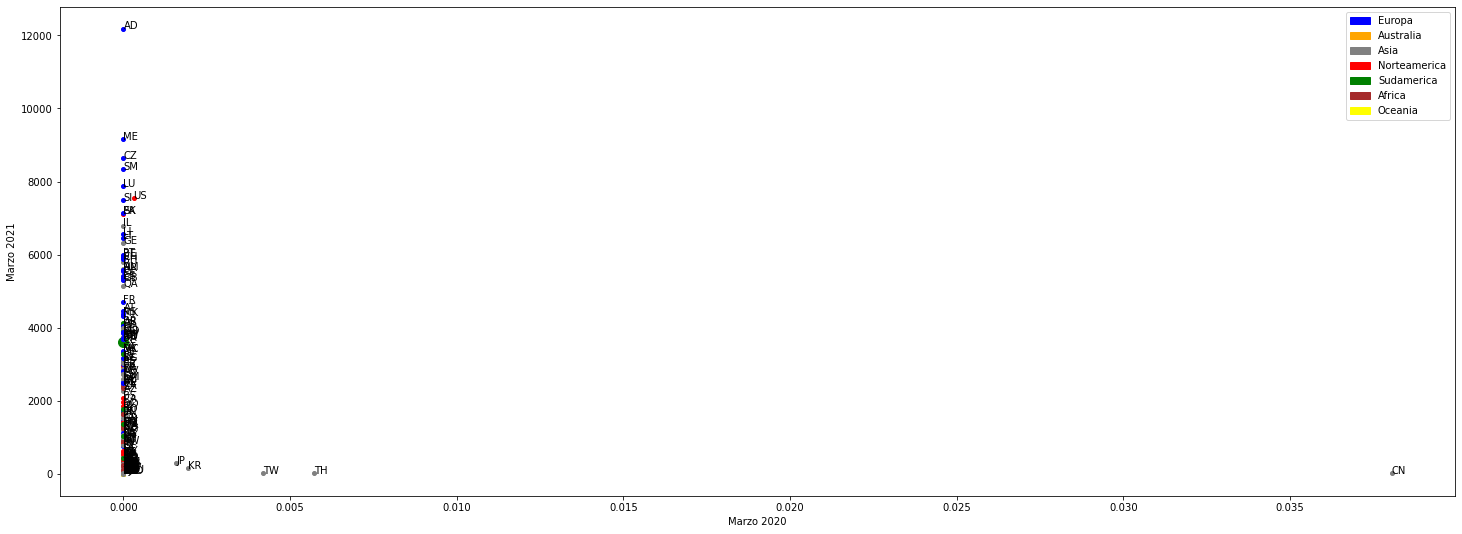

In [31]:
plt.figure(figsize=(25,9))
legend_continentes=[mpatches.Patch(color='blue', label='Europa'),mpatches.Patch(color='orange', label='Australia'),mpatches.Patch(color='grey', label='Asia'), 
mpatches.Patch(color='red', label='Norteamerica'),mpatches.Patch(color='green', label='Sudamerica'),mpatches.Patch(color='brown', label='Africa'), 
mpatches.Patch(color='yellow', label='Oceania')]
plt.legend(handles=legend_continentes)
l=(len(incidencia1))
plt.xlabel('Marzo 2020')
plt.ylabel('Marzo 2021')
for i in range(l):
    co= (color(country_to_continent(incidencia1.index[i])))
    x=incidencia1[i]
    y =incidencia2[i]

    if incidencia1.index[i]=='Chile':
        plt.plot(x,y,'o',markersize=10,c=co)
    else:
        plt.plot(x,y,'o',markersize=4,c=co)
for i, label in enumerate(codes):
    plt.text(incidencia1[i], incidencia2[i],label)
plt.show()

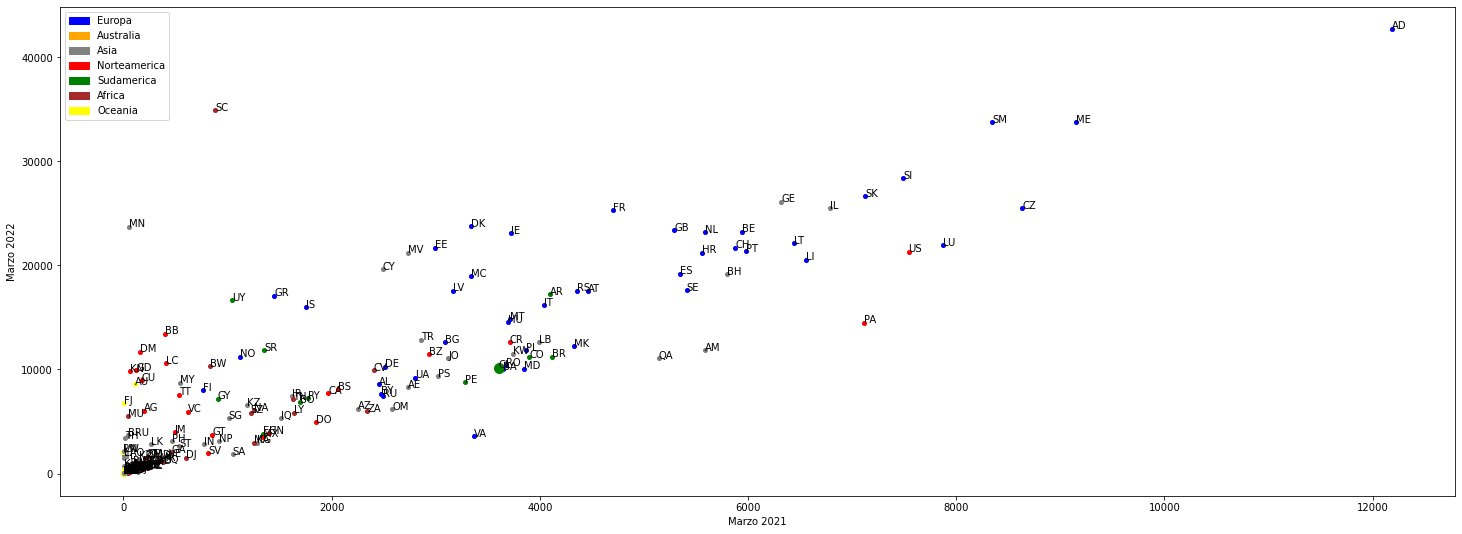

In [32]:
plt.figure(figsize=(25,9))
legend_continentes=[mpatches.Patch(color='blue', label='Europa'),mpatches.Patch(color='orange', label='Australia'),mpatches.Patch(color='grey', label='Asia'), 
mpatches.Patch(color='red', label='Norteamerica'),mpatches.Patch(color='green', label='Sudamerica'),mpatches.Patch(color='brown', label='Africa'), 
mpatches.Patch(color='yellow', label='Oceania')]
plt.xlabel('Marzo 2021')
plt.ylabel('Marzo 2022')
plt.legend(handles=legend_continentes)
l=(len(incidencia1))
for i in range(l):
    co= (color(country_to_continent(incidencia1.index[i])))
    x=incidencia2[i]
    y =incidencia3[i]

    if incidencia1.index[i]=='Chile':
        plt.plot(x,y,'o',markersize=10,c=co)
    else:
        plt.plot(x,y,'o',markersize=4,c=co)
for i, label in enumerate(codes):
    plt.text(incidencia2[i], incidencia3[i],label)

plt.show()

## Muerte

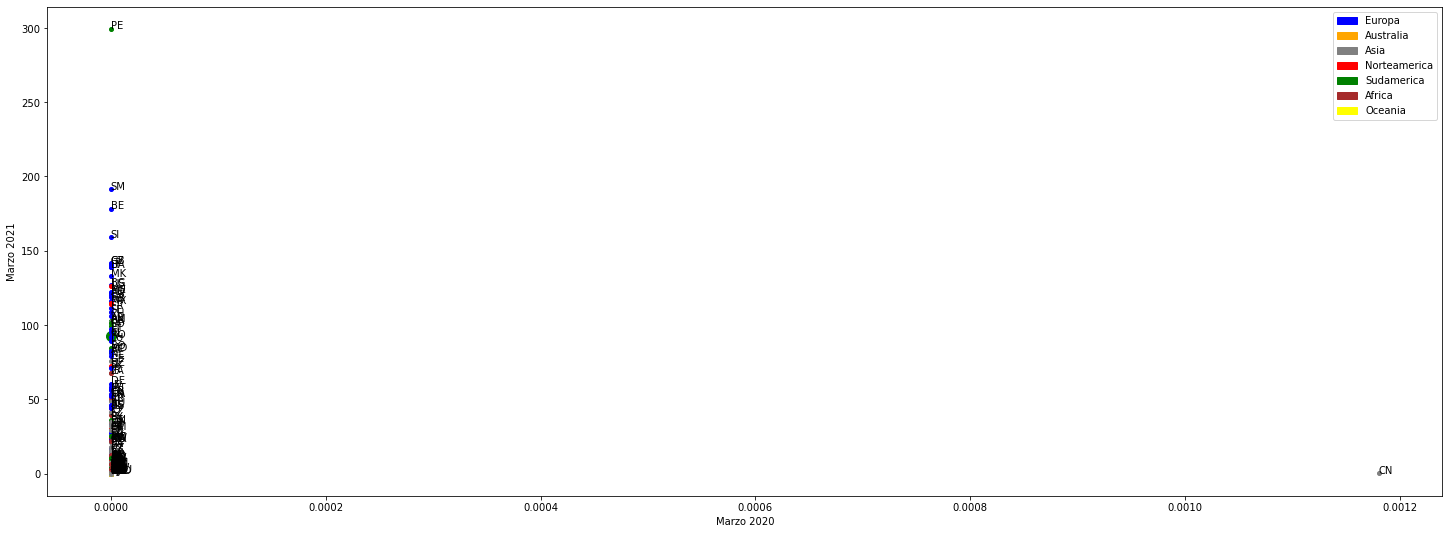

In [33]:
plt.figure(figsize=(25,9))
legend_continentes=[mpatches.Patch(color='blue', label='Europa'),mpatches.Patch(color='orange', label='Australia'),mpatches.Patch(color='grey', label='Asia'), 
mpatches.Patch(color='red', label='Norteamerica'),mpatches.Patch(color='green', label='Sudamerica'),mpatches.Patch(color='brown', label='Africa'), 
mpatches.Patch(color='yellow', label='Oceania')]
plt.legend(handles=legend_continentes)
l=(len(incidencia1))
plt.xlabel('Marzo 2020')
plt.ylabel('Marzo 2021')

for i in range(l):
    co= (color(country_to_continent(incidencia1.index[i])))
    x=muerte1[i]
    y =muerte2[i]

    if incidencia1.index[i]=='Chile':
        plt.plot(x,y,'o',markersize=10,c=co)
    else:
        plt.plot(x,y,'o',markersize=4,c=co)
for i, label in enumerate(codes):
    plt.text(muerte1[i], muerte2[i],label)
plt.show()


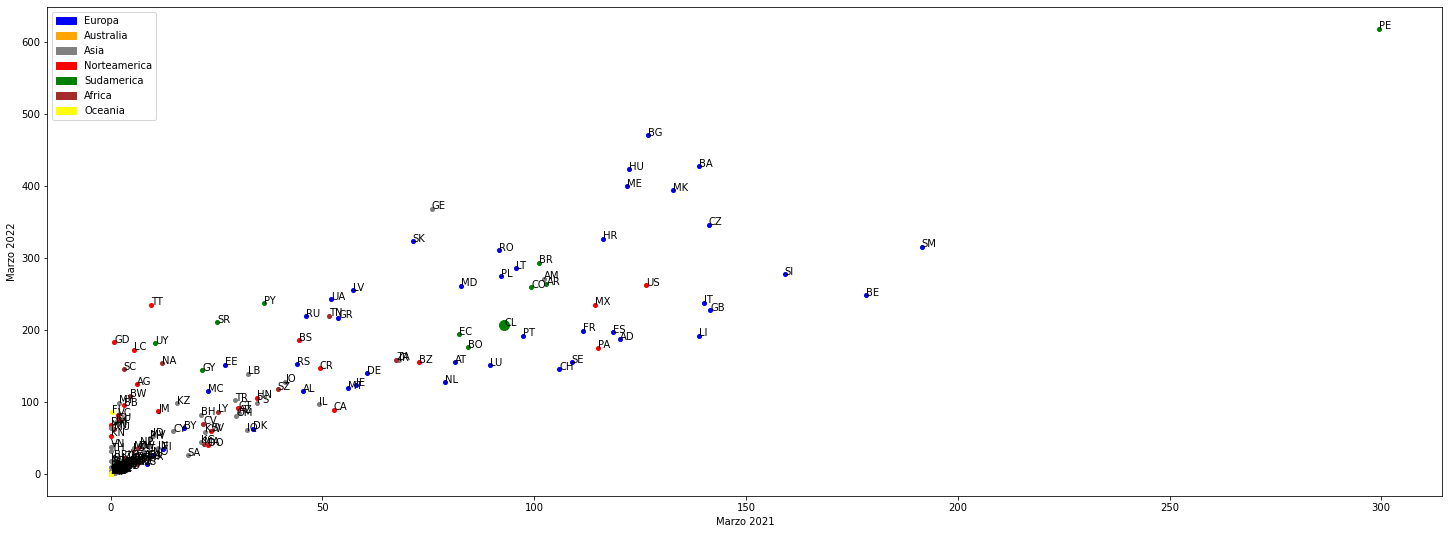

In [34]:
plt.figure(figsize=(25,9))
legend_continentes=[mpatches.Patch(color='blue', label='Europa'),mpatches.Patch(color='orange', label='Australia'),mpatches.Patch(color='grey', label='Asia'), 
mpatches.Patch(color='red', label='Norteamerica'),mpatches.Patch(color='green', label='Sudamerica'),mpatches.Patch(color='brown', label='Africa'), 
mpatches.Patch(color='yellow', label='Oceania')]
plt.legend(handles=legend_continentes)
l=(len(incidencia1))
plt.xlabel('Marzo 2021')
plt.ylabel('Marzo 2022')
for i in range(l):
    co= (color(country_to_continent(incidencia1.index[i])))
    x=muerte2[i]
    y =muerte3[i]

    if incidencia1.index[i]=='Chile':
        plt.plot(x,y,'o',markersize=10,c=co)
        # plt.text(x[i],y[i],paises[i])
    else:
        plt.plot(x,y,'o',markersize=4,c=co)
        # plt.text(x[i],y[i],paises[i])

for i, label in enumerate(codes):
    plt.text(muerte2[i], muerte3[i],label)
    

plt.show()

En base a los rankings y gráficas de nube de punto analice y discuta sobre el caso de Chile ¿A qué países del (a) mundo, (b) América Latina y (c) la [OCDE](https://es.wikipedia.org/wiki/Organizaci%C3%B3n_para_la_Cooperaci%C3%B3n_y_el_Desarrollo_Econ%C3%B3micos) se parece más? 

### Paises del mundo

En tasa de incidencia tomando en cuenta la de 2021-2022 tenemos que Chile se parece a Bosnia y a Rumania seguidos por Kuwait, en el caso de los decesos, los paises mas cercanos seria Portugal, luego le seguirian Polonia y Luxemburgo en este caso no añadiremos los paises de América Latina


### Paises Latinoamerica
En tasa de incidencia tomando en cuenta la de 2021-2022 tenemos que Chile se parece a Perú y a Colombia, en el caso de los decesos, los paises mas cercanos serian Ecuador y Bolivia, luego le seguirian Argentina y Colombia

#### OCDE

En este caso para la tasa de incidencia se repite Rumania, Polonia. Y en caso de decesos tenemos a Portugal y Luxemburgo

## Análisis comparativo (1.5pt)

Construya una interfaz gráfica usando `ipywidgets` y `matplotlib` que permita realizar comparaciones entre las series de tiempo de COVID-19 de dos países seleccionados arbitrariamente. A modo de simplificación considere sólo los países de la [OCDE](https://es.wikipedia.org/wiki/Organizaci%C3%B3n_para_la_Cooperaci%C3%B3n_y_el_Desarrollo_Econ%C3%B3micos). 

Requerimientos:

1. La interfaz debe incluir controles para escoger dos países a partir de una lista
1. La interfaz debe incluir tres [tabs](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html#Tabs), el primero debe mostrar las series de tiempo de ambos países de los casos confirmados, el segundo la de recuperados y el tercero la de los decesos, respectivamente. Use una leyenda para indicar el nombre de los países.
1. La interfaz debe tener un control que permita escoger entre casos acumulados y casos nuevos. Hint: Para los casos nuevos pueden revisar la función [`diff`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.diff.html)
1. La interfaz debe tener un control que permita escoger entre valores absolutos y valores relativos (tasas por 100.000 habitantes)
1. La interfaz debe tener un control que permita escoger entre valores diarios y valores semanales. Para esto último se recomienda usar `groupby` con una [frecuencia lunes a lunes](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#anchored-offsets)
    



In [35]:
ocde = ['Canada', 'Chile', 'United Kingdom', 'Denmark', 'Iceland', 'Norway', 'Turkey', 'Spain', 'Portugal',
        'France', 'Ireland', 'Belgium', 'Germany', 'Greece', 'Sweden', 'Switzerland', 'Austria', 'Netherlands',
        'Luxembourg', 'Italy', 'Japan', 'Finland', 'Australia', 'New Zealand', 'Mexico','Hungary', 'Poland', 'South Korea', 'Slovakia', 'Chile', 'Slovenia', 'Israel', 'Estonia', 'Latvia',
        'Lithuania', 'Colombia']

opciones = ['Casos confirmados','Casos recuperados', 'Decesos']
 #x es fecha, y es cantidad
def confirmados(pais,valores, casos, valores_t, pais2):
    fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True, facecolor='w')

    if (casos == 'Casos acumulados'):
        datos = conf_pob.T[pais][1:-1]
        datos2 = conf_pob.T[pais2][1:-1]

    else:
        #Casos absolutos
        datos = abs(conf_pob.T[pais][1:-1].diff())
        datos2 = abs(conf_pob.T[pais2][1:-1].diff())

    if (valores_t == 'Valores semanales'):

        fechas = conf_pob.T[pais].index

        df_fechas=conf_pob.T.copy()
        df_fechas['Fechas'] = fechas
        df_fechas2 = df_fechas[1:-1].groupby([pd.Grouper(key='Fechas', freq='W-MON')])[pais2].sum().reset_index()
        df_fechas = df_fechas[1:-1].groupby([pd.Grouper(key='Fechas', freq='W-MON')])[pais].sum().reset_index()
        datos = df_fechas[pais][1:-1]
        datos2 = df_fechas2[pais2][1:-1]


    if (valores == "Valores absolutos"):
        x = datos
        x2 = datos2

    else:
        x = [a*100000/(conf_pob.T[pais][-1]) for a in datos]
        x2 = [a*100000/(conf_pob.T[pais2][-1]) for a in datos2]
        
    titulo = pais + ' vs ' + pais2
    plt.plot(x, label='pais')
    plt.plot(x2, label=pais2)
    plt.xlabel("Fecha")
    plt.ylabel("N casos")
    
    plt.title(titulo)

    ax.legend([pais,pais2])
    plt.show()

def recuperados(pais,valores, casos, valores_t, pais2):

    fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True, facecolor='w')

    if (casos == 'Casos acumulados'):
        datos = rec_pob.T[pais][1:-1]
        datos2 = rec_pob.T[pais2][1:-1]

    else:
        #Casos absolutos
        datos = abs(rec_pob.T[pais][1:-1].diff())
        datos2 = abs(rec_pob.T[pais2][1:-1].diff())

    if (valores_t == 'Valores semanales'):

        fechas = rec_pob.T[pais].index

        df_fechas=rec_pob.T.copy()
        df_fechas['Fechas'] = fechas
        df_fechas2 = df_fechas[1:-1].groupby([pd.Grouper(key='Fechas', freq='W-MON')])[pais2].sum().reset_index()
        df_fechas = df_fechas[1:-1].groupby([pd.Grouper(key='Fechas', freq='W-MON')])[pais].sum().reset_index()
        datos = df_fechas[pais][1:-1]
        datos2 = df_fechas2[pais2][1:-1]


    if (valores == "Valores absolutos"):
        x = datos
        x2 = datos2

    else:
        x = [a*100000/(rec_pob.T[pais][-1]) for a in datos]
        x2 = [a*100000/(rec_pob.T[pais2][-1]) for a in datos2]
        
    titulo = pais + ' vs ' + pais2
    plt.plot(x, label='pais')
    plt.plot(x2, label=pais2)
    plt.xlabel("Fecha")
    plt.ylabel("N casos")
    
    plt.title(titulo)

    ax.legend([pais,pais2])
    plt.show()

def muertes(pais,valores, casos, valores_t, pais2):

    fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True, facecolor='w')

    if (casos == 'Casos acumulados'):
        datos = muerte_pob.T[pais][1:-1]
        datos2 = muerte_pob.T[pais2][1:-1]

    else:
        #Casos absolutos
        datos = abs(muerte_pob.T[pais][1:-1].diff())
        datos2 = abs(muerte_pob.T[pais2][1:-1].diff())

    if (valores_t == 'Valores semanales'):

        fechas = muerte_pob.T[pais].index

        df_fechas=muerte_pob.T.copy()
        df_fechas['Fechas'] = fechas
        df_fechas2 = df_fechas[1:-1].groupby([pd.Grouper(key='Fechas', freq='W-MON')])[pais2].sum().reset_index()
        df_fechas = df_fechas[1:-1].groupby([pd.Grouper(key='Fechas', freq='W-MON')])[pais].sum().reset_index()
        datos = df_fechas[pais][1:-1]
        datos2 = df_fechas2[pais2][1:-1]


    if (valores == "Valores absolutos"):
        x = datos
        x2 = datos2

    else:
        x = [a*100000/(conf_pob.T[pais][-1]) for a in datos]
        x2 = [a*100000/(conf_pob.T[pais2][-1]) for a in datos2]
        
    titulo = pais + ' vs ' + pais2
    plt.plot(x, label='pais')
    plt.plot(x2, label=pais2)
    plt.xlabel("Fecha")
    plt.ylabel("N casos")
    
    plt.title(titulo)

    ax.legend([pais,pais2])
    plt.show()

In [36]:
pais1=widgets.Dropdown(
    options=ocde,
)
pais2=widgets.Dropdown(
    options=ocde,
)

op_casos=widgets.Dropdown(
    options=['Casos acumulados','Casos nuevos'],
)
op_valores=widgets.Dropdown(
    options=['Valores absolutos','Valores relativos'],
)
op_valores_t=widgets.Dropdown(
    options=['Valores diarios','Valores semanales'],
)


def mostrar(pais1, pais2, op_casos, op_valores, op_valores_t):

    tab1 = widgets.Output()
    tab2 = widgets.Output()
    tab3 = widgets.Output()

    tab = widgets.Tab(children = [tab1,tab2,tab3])

    tab.set_title(0,opciones[0])
    tab.set_title(1,opciones[1])
    tab.set_title(2,opciones[2])

    display(tab)

    with tab1:
        confirmados(pais1, op_valores, op_casos, op_valores_t, pais2)
    with tab2:
        recuperados(pais1, op_valores, op_casos, op_valores_t, pais2)
    with tab3:
        muertes(pais1, op_valores, op_casos, op_valores_t, pais2)


widgets.interact(mostrar, pais1=pais1, pais2=pais2,  op_casos=op_casos, op_valores=op_valores, op_valores_t=op_valores_t)

interactive(children=(Dropdown(description='pais1', options=('Canada', 'Chile', 'United Kingdom', 'Denmark', '…

<function __main__.mostrar(pais1, pais2, op_casos, op_valores, op_valores_t)>

## Dashboard interactivo (1.0pt)

Implemente un *dashboard web* interactivo a partir de la interfaz desarrollada en el punto anterior utilizando la librería [voila](https://github.com/voila-dashboards/voila). Sirva su interfaz en la nube, para esto puede considerar los servicios gratuitos [binder](https://mybinder.org/) o [heroku](https://www.heroku.com/free). Revise la documentación de voila [con respecto a *deployment* en la nube](https://voila.readthedocs.io/en/stable/deploy.html) y este repositorio con [un ejemplo en base a heroku](https://github.com/voila-dashboards/voila-heroku). 

Escriba el link de su dashboard web a continuación:

In [37]:
conda install -c conda-forge watermark

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [38]:
#Versiones usadas para el requeriments, la version de pandas fue menor ya que esta era muy nueva, se dejo la 1.3.5 para evitar problemas
%load_ext watermark

%watermark -v -m -p pandas,numpy,watermark,matplotlib,ipywidgets,pycountry,pycountry_convert

%watermark -u -n -t -z

Python implementation: CPython
Python version       : 3.10.0
IPython version      : 8.1.1

pandas           : 1.4.1
numpy            : 1.21.5
watermark        : 2.3.0
matplotlib       : 3.5.1
ipywidgets       : 7.6.5
pycountry        : 22.3.5
pycountry_convert: 0.7.2

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : AMD64 Family 23 Model 96 Stepping 1, AuthenticAMD
CPU cores   : 6
Architecture: 64bit

Last updated: Fri Apr 22 2022 00:24:37Hora est. Sudamérica Pacífico



https://notebooks.gesis.org/binder/jupyter/user/wildbenito-prueba-binder-2-l0jgcdjp/doc/tree/enunciado2.ipynb

Debido a un problema de branches se decidio subir a otro reppositorio más "limpio" para evitar problemas subiendo el archivo a binder.

Repositorio de proeba para mantener Binder: https://github.com/WildBenito/Prueba-Binder-2


## Discusión final (1.0pt)

En base a su interfaz:   

1. Describa en detalle la situación de Chile con respecto a la evolución temporal de las series de tiempo. En particular destaque patrones y comportamientos que considere relevantes y compare lo que observa en las distintas series de tiempo. Considerando la evolución a nivel de semana, conteste ¿En qué fechas ocurre un aumento o disminución notoria de los casos? ¿En qué fechas hay máximos y mínimos?
1. Considerando métricas que sean relativas compare el caso de Chile contra cinco países de la OCDE seleccionados por ustedes. Destaque semejanzas y diferencias considerando las cantidades y los posibles desfases temporales existentes.

1. Comprobando en el ranking de incidencia, muertes y recuperación, se puede observar que Chile (tomándolo todo con un cierto grado de incertidumbre por la falta de datos),
 el punto más bajo de los contagios fue en 2021, lo que indica además un menor número de muertes y de recuperados. Sin embargo, se ve un resurgimiento del virus en el año 2022, el cuál si bien aumenta el número de casos de contagiados, y levemente de muertos, se puede ver que los recuperados aumentan fuertemente, cosa que podemos inferir que fue gracias al surgimiento de las vacunas. Tenemos que en mayo de 2020 comenzó a aumentar la cantidad de casos la cual podría corresponder a la primera ola. Luego la siguiente seria en enero del 2021 atribuible a la temporada de vacaciones. Posteriormente en mayo tenemos otro peak podría ser debido a semana santa. Luego de junio tenemos un descenso en los casos los cuales estaban en un peak por posibles vacaciones de invierno. Luego vemos un aumento en diciembre y el peak más grande hasta la fecha en enero de 2022.
2.
 - Chile vs Canada: Respecto de los casos confirmados y recuperados su comportamiento es bastante similar, aunque en casos recuperados parecen faltar datos cerca de finales del 2021. Respecto de las muertes Chile presenta más muertes confirmadas que Canada.
- Chile vs Dinamarca: En casos recuperados la curva de Chile sube mucho menos abruptamente que la de Dinamraca, aunque ambos llegan a extremos similares, sin embargo, esto no se ve reflejado en los casos recuperados, aunque quizá sea por la falta de datos posteriores, y finalmente la tasa de decesos de Dinamarca es increíblemente menor a la de Chila, lo que no habla muy bien quizá del sistema de salud de nuestro país.
- Chile vs Italia: La curva de casos confirmados de Italia es considerablemente más grande que la de Chile y crese antes lo que se debe a que en dichos países de Europa llego primero el virus, la tasa de recuperados se condice con la de contagios, sin embargo los decesos de Italia son lejos mucho más elevadas a las de Chile.
- Chile vs Japon: La grafica de Japon experimenta un drástico aumento a principios de 2022 quizá incentivada por la flexibilización de las medidas sanitarias, los casos recuperados nuevamente se ven truncados por la falta de datos y las muertes son relativamente bajas respecto de chile.
- Chile vs Mexico: Mexico presenta una curva casi el doble de empinada que Chile en contagios, lo que se ve reflejado en la tasa de recuperados hasta cierto punto, las muertes sin embargo son increíblemente elevadas respecto de nuestro país.
